## Grouping Species using K-Means

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [7]:
dataset = pd.read_excel('C:/Users/nooriza maharani/Documents/Dissertation/species_habitat_mammal_bird67.xls')

In [9]:
dataset

,class,scientific_name,year_compiled,category,habitat,min_alt,max_alt
0,mammalia,Presbytis chrysomelas,2020,CR,,0,100
1,mammalia,Nycticebus borneanus,2020,VU,"Forest, Artificial/Terrestrial",20,150
2,mammalia,Trachypithecus cristatus,2020,VU,"Forest, Artificial/Terrestrial",0,300
3,mammalia,Nasalis larvatus,2021,EN,,0,350
4,mammalia,Pongo pygmaeus,2023,CR,,0,500
...,...,...,...,...,...,...,...
62,aves,Ciconia stormi,2013,EN,"Forest, Wetlands (inland)",0,200
63,aves,Melanoperdix niger,2021,VU,Forest,0,1200
64,aves,Lophura ignita,2012,VU,"Forest, Artificial/Terrestrial",10,1000
65,aves,Geokichla interpres,2020,EN,"Forest, Artificial/Terrestrial",80,1000


In [57]:
# filtering out altitude
# alt = dataset[['min_alt', 'max_alt']]
alt = dataset[['max_alt']]

In [59]:
dataset.describe()

,year_compiled,min_alt,max_alt,cluster
count,67.000000,67.000000,67.000000,67.000000
mean,2016.880597,24.940299,1249.910448,0.641791
std,5.174302,106.747774,841.999383,0.513499
min,2006.000000,0.000000,30.000000,0.000000
25%,2013.000000,0.000000,600.000000,0.000000
50%,2020.000000,0.000000,1200.000000,1.000000
75%,2021.000000,0.000000,1700.000000,1.000000
max,2024.000000,800.000000,3900.000000,2.000000


In [61]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data matching summary stats
n = 67
min_alt = np.clip(np.random.normal(loc=24.94, scale=106.75, size=n), 0, 800)
max_alt = np.clip(np.random.normal(loc=1249.91, scale=842.00, size=n), 30, 3900)

# Ensure max_alt >= min_alt
max_alt = np.maximum(max_alt, min_alt + 30)  # Minimum difference of 30 meters
data = pd.DataFrame({'min_alt': min_alt, 'max_alt': max_alt})

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['cluster'] = kmeans.fit_predict(scaled_data)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


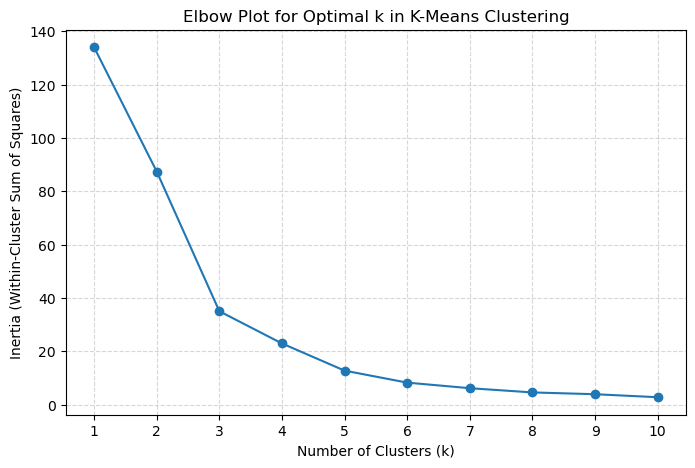

In [63]:

# Create elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='#1f77b4')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Plot for Optimal k in K-Means Clustering')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(k_range)
plt.show()

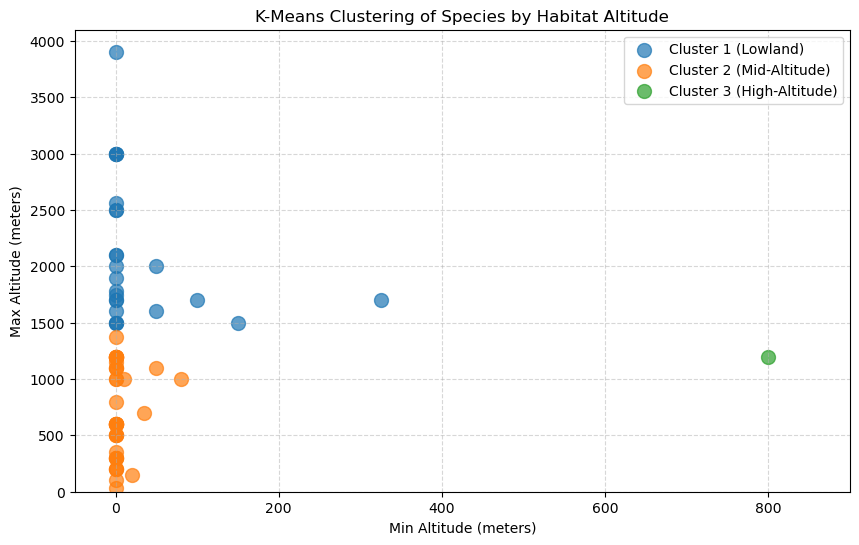

In [35]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green for clusters
labels = ['Cluster 1 (Lowland)', 'Cluster 2 (Mid-Altitude)', 'Cluster 3 (High-Altitude)']

# Plot each cluster
for cluster in range(3):
    cluster_data = dataset[dataset['cluster'] == cluster]
    plt.scatter(cluster_data['min_alt'], cluster_data['max_alt'], 
                c=colors[cluster], label=labels[cluster], s=100, alpha=0.7)

# Customize plot
plt.xlabel('Min Altitude (meters)')
plt.ylabel('Max Altitude (meters)')
plt.title('K-Means Clustering of Species by Habitat Altitude')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-50, 900)  # Slightly extend for visibility
plt.ylim(0, 4100)   # Slightly extend for visibility
plt.show()

In [53]:
# Define cluster labels for interpretation
cluster_labels = {
    0: 'Cluster 1 (Lowland)',
    1: 'Cluster 2 (Mid-Altitude)',
    2: 'Cluster 3 (High-Altitude)'
}

# Print DataFrame for each cluster
print("DataFrames for Each Cluster:\n")
for cluster in range(3):
    cluster_data = dataset[dataset['cluster'] == cluster][['min_alt', 'max_alt']].round(2)
    print(f"{cluster_labels[cluster]} ({len(cluster_data)} species):")
    print(cluster_data.to_string(index=True))
    print("\nSummary Statistics:")
    print(f"  Min Altitude: mean={cluster_data['min_alt'].mean():.2f}, std={cluster_data['min_alt'].std():.2f}")
    print(f"  Max Altitude: mean={cluster_data['max_alt'].mean():.2f}, std={cluster_data['max_alt'].std():.2f}\n")

DataFrames for Each Cluster:

Cluster 1 (Lowland) (25 species):
    min_alt  max_alt
18        0     1500
19        0     1500
20       50     1600
21        0     1600
22        0     1700
23      325     1700
24        0     1700
25      100     1700
26        0     1784
27        0     1900
28       50     2000
29        0     2000
30        0     2100
31        0     2100
32        0     2500
33        0     2500
34        0     3000
35        1     3000
36        0     3000
37        0     3000
38        0     3900
43        0     1750
54        0     1500
58        0     2560
66      150     1500

Summary Statistics:
  Min Altitude: mean=27.04, std=72.12
  Max Altitude: mean=2123.76, std=640.96

Cluster 2 (Mid-Altitude) (41 species):
    min_alt  max_alt
0         0      100
1        20      150
2         0      300
3         0      350
4         0      500
5        35      700
6         0      800
7         0     1000
8         0     1100
9         0     1100
10        0     110

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

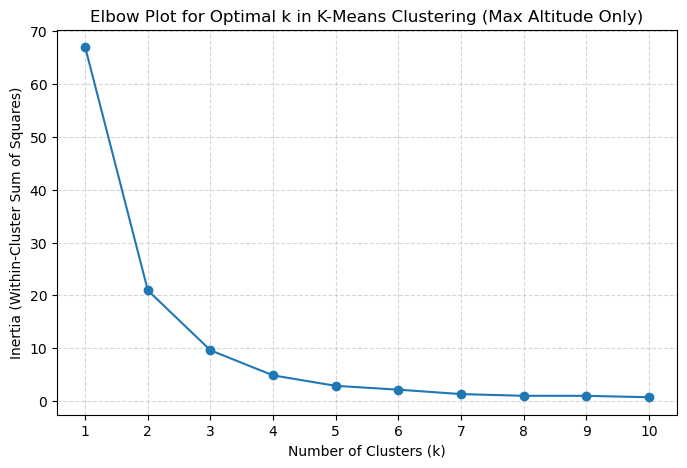

In [65]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for max_alt matching summary statistics
n = 67
max_alt = np.clip(np.random.normal(loc=1249.91, scale=842.00, size=n), 30, 3900)

# Create DataFrame with max_alt only
data = pd.DataFrame({'max_alt': max_alt})

# Standardize max_alt for k-means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Compute inertia for k=1 to 10
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Create elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='#1f77b4')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Plot for Optimal k in K-Means Clustering (Max Altitude Only)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(k_range)
plt.show()


## Viz Forest Loss per Altitude

In [13]:
df = pd.read_excel('C:/Users/nooriza maharani/Documents/Dissertation/loss_per_altitude_100m.xls')

In [7]:
df.columns

Index(['altitude_bin_min', 'altitude_bin_max', 'Alt_range', 'loss_ha'], dtype='object')

In [9]:
import matplotlib.pyplot as plt

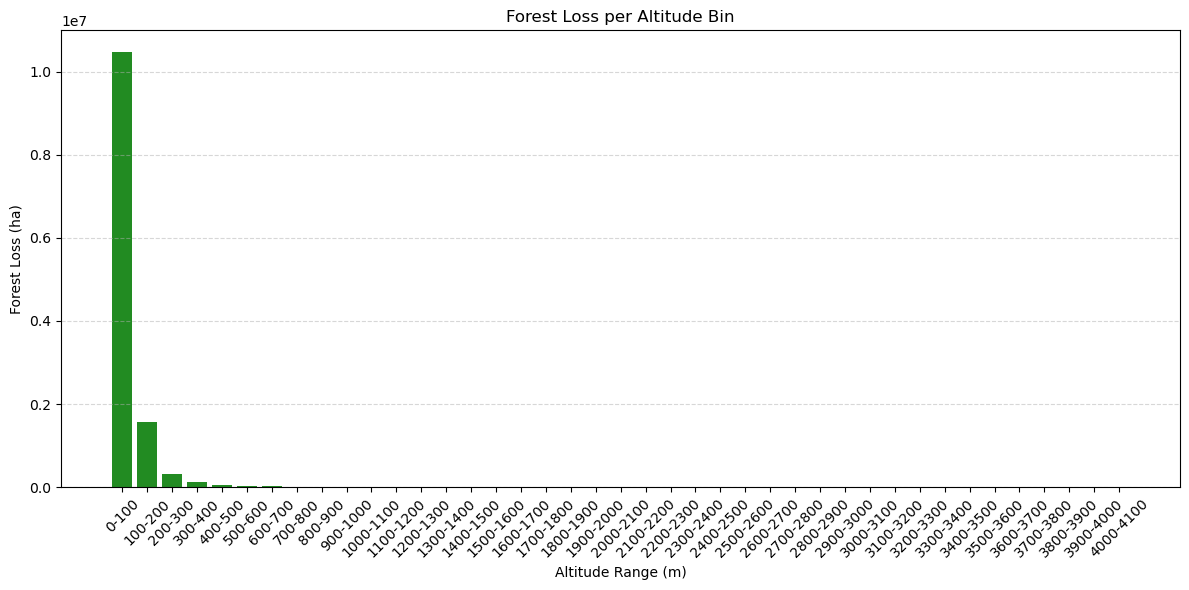

In [15]:
# Sort by altitude_bin_min (just in case)
df = df.sort_values('altitude_bin_min')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df['Alt_range'], df['loss_ha'], color='forestgreen')

# Customize chart
plt.xlabel('Altitude Range (m)')
plt.ylabel('Forest Loss (ha)')
plt.title('Forest Loss per Altitude Bin')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

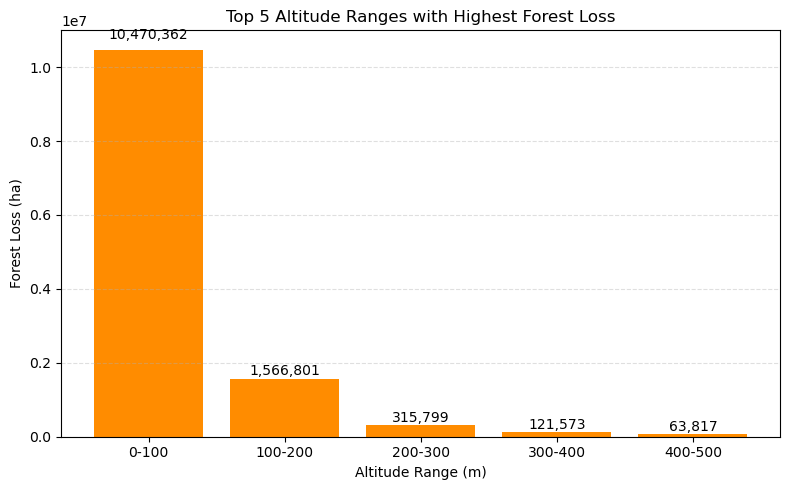

In [21]:
# Sort by loss descending
top5 = df.sort_values('loss_ha', ascending=False).head(5)

# Plot top 3
plt.figure(figsize=(8, 5))
plt.bar(top5['Alt_range'], top5['loss_ha'], color='darkorange')

# Add value labels on top
for i, val in enumerate(top5['loss_ha']):
    plt.text(i, val + val * 0.02, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

# Customize chart
plt.xlabel('Altitude Range (m)')
plt.ylabel('Forest Loss (ha)')
plt.title('Top 5 Altitude Ranges with Highest Forest Loss')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()